In [ ]:
import numpy as np
import matplotlib.pyplot as plt

Error: 0.5789896979188494
Error: 0.002110513303079811
Error: 0.0014602972643277898
Error: 0.0011794755809837161
Error: 0.0010143146984253027
Error: 0.0009026108214550583
Выход
[[1.12489211e-03]
 [9.86972664e-04]
 [9.98464278e-01]
 [9.98585074e-01]
 [1.67953252e-05]
 [2.45351647e-05]
 [8.56755715e-04]
 [8.05125316e-04]
 [9.88068561e-04]
 [8.32920870e-04]
 [9.98545565e-01]
 [9.98469595e-01]
 [2.21266553e-05]
 [3.08899494e-05]
 [7.87354873e-04]
 [7.19381666e-04]]


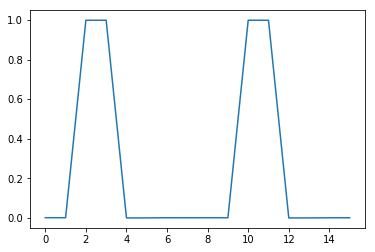

In [6]:
def nonlin(x, deriv=False):
    if(deriv==True):
        return (x*(1-x))
    
    return 1/(1+np.exp(-x))

#Входные данные 5 значение - смещение
X = np.array([[0, 0, 0, 0, 1],
            [0, 0, 0, 1, 1],
            [0, 0, 1, 0, 1],
            [0, 0, 1, 1, 1],
            [0, 1, 0, 0, 1],
            [0, 1, 0, 1, 1],
            [0, 1, 1, 0, 1],
            [0, 1, 1, 1, 1],
            [1, 0, 0, 0, 1],
            [1, 0, 0, 1, 1],
            [1, 0, 1, 0, 1],
            [1, 0, 1, 1, 1],
            [1, 1, 0, 0, 1],
            [1, 1, 0, 1, 1],
            [1, 1, 1, 0, 1],
            [1, 1, 1, 1, 1]])

#Выходные значения
y = np.array([[0],
             [0],
             [1],
             [1],
             [0],
             [0],
             [0],
             [0],
             [0],
             [0],
             [1],
             [1],
             [0],
             [0],
             [0],
             [0]])

# Начальное значение для генератора случайных чисел установлено так,
# что он будет возвращать одинаковые случайные числа каждый раз,
# что иногда полезно для отладки.
np.random.seed(1)

# Теперь мы вводим веса в случайные значения. syn0-это веса между входным и скрытым слоями.
# Это матрица 3x4, потому что есть два входных веса плюс член смещения (=3) и четыре узла
# в скрытом слое (=4). syn1-это веса между скрытым и выходным слоями. Это матрица 4x1,
# потому что есть 4 узла в скрытом слое и один выход.

#Синапсы
syn0 = 2*np.random.random((5,4)) - 1  # 3x4 матрица весов ((2 входа + 1 смещение) x 4 узла в скрытом слое)
syn1 = 2*np.random.random((4,1)) - 1  # 4x1 матрица весов .  (4 узла x 1 выход) - нет смещения в скрытом слое.


for j in range(60000):  
    

    l0 = X
    l1 = nonlin(np.dot(l0, syn0))
    l2 = nonlin(np.dot(l1, syn1), 14)
    
    
    l2_error = y - l2
    if(j % 10000) == 0:   # Only print the error every 10000 steps, to save time and limit the amount of output. 
        print("Error: " + str(np.mean(np.abs(l2_error))))
        
    l2_delta = l2_error*nonlin(l2, deriv=True)
    
    l1_error = l2_delta.dot(syn1.T)
    
    l1_delta = l1_error * nonlin(l1,deriv=True)
    
    #update weights (no learning rate term)
    syn1 += l1.T.dot(l2_delta)
    syn0 += l0.T.dot(l1_delta)
    
print("Выход")
print(l2)
plt.plot(l2)